# DISCRETE FOURIER TRANSFORM

In [9]:
import numpy as np
import matplotlib.pyplot as plt

The Discrete Fourier Transform (DFT) of a real signal is defined as:

$$
\text{Re}X[k] = \sum_{n = 0}^{N-1}x[n]\cos(2\pi kn/N)
$$

$$
\text{Im}X[k] = \sum_{n = 0}^{N-1}x[n]\sin(2\pi kn/N)
$$

The following functions returns the real and imaginary components. They also return the magnitude and phase of the DFT:

In [5]:
def Re_FT(k,x):
    N = x.shape[0]
    i = np.array(range(N))
    cosines = np.cos(2*np.pi*k*i/N)
    return np.dot(x,cosines)

def Im_FT(k,x):
    N = x.shape[0]
    i = np.array(range(N))
    sines = np.sin(2*np.pi*k*i/N)
    return np.dot(x,sines)

def magnitud(real, imag):
    return (real**2 + imag**2)**0.5

def fase(real,imag):
    return np.arctan2(real,imag)

def FT(x):
    N = x.shape[0]
    
    Re = np.zeros((N,))
    Im = np.zeros((N,))
    Mg = np.zeros((N,))
    Fs = np.zeros((N,))

    for k in range(N):
        Re[k] = Re_FT(k,x)
        Im[k] = Im_FT(k,x)
        Mg[k] = magnitud(Re[k],Im[k])
        Fs[k] = fase(Re[k],Im[k])
        
    return Re, Im, Mg, Fs

The signal $x(t)$ with frequency components  $f_1 = 100$ Hz, $f_2 = 400$ Hz

$$
x(t) = \sin(2\pi f_1 t) + 0.5\sin(2\pi f_2 t)
$$

is used to test the DFT. 

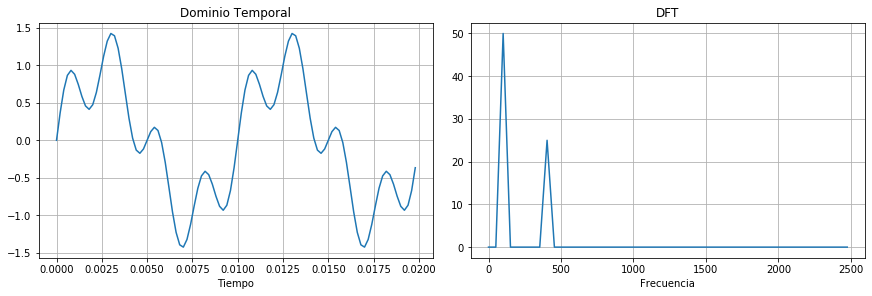

In [6]:
fs = 5000

f1 = 100
f2 = 400

t = np.arange(0, 2/f1, 1/fs)

N = t.shape[0]

f = np.linspace(0,fs,N)

x = np.sin(2*np.pi*t*f1)
x = 0.5*np.sin(2*np.pi*t*f2) + x

Re, Im, Mg, Fs = FT(x)

fig, (ax0, ax1) = plt.subplots(ncols = 2,
                               constrained_layout = True,
                               figsize = (12,4))

ax0.plot(t, x)
ax0.set_title('Dominio Temporal')
ax0.grid()
ax0.set_xlabel('Tiempo')

ax1.plot(f[0:N//2],Mg[0:N//2])
ax1.set_title('DFT')
ax1.grid()
ax1.set_xlabel('Frecuencia');

This section demonstrates that a Gaussian signal in the time domain has a Gaussian representation in the frequency domain. 

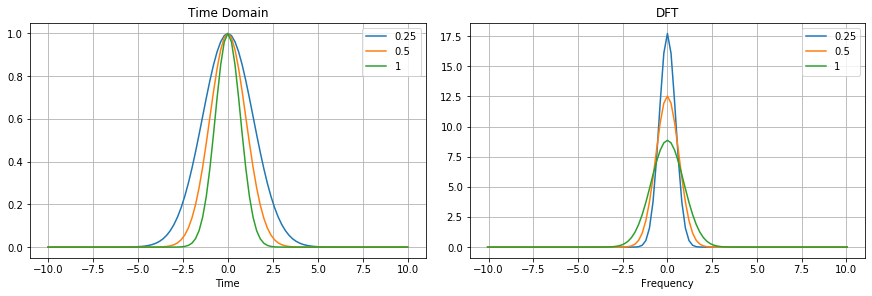

In [8]:
fig, (ax0, ax1) = plt.subplots(ncols = 2,
                               constrained_layout = True,
                               figsize = (12,4))

N = 101
n = np.linspace(-10, 10, N)
fs = N/n[n.shape[0]-1] - n[0]
f = np.linspace(-fs/2,fs/2,N)

a = 0.25
x = np.exp(-a*np.power(n,2))
Re, Im, Mg, Fs = FT(x)

ax0.plot(n, x, label = str(a))
ax1.plot(f,np.concatenate((Mg[(N+1)//2:N],Mg[0:(N+1)//2])), label = str(a))
Mg=Mg/N
x1=x
a = 0.5
x = np.exp(-a*np.power(n,2))

Re, Im, Mg, Fs = FT(x)

ax0.plot(n, x, label = str(a))
ax1.plot(f,np.concatenate((Mg[(N+1)//2:N],Mg[0:(N+1)//2])), label = str(a))
Mg=Mg/N
x2=x

a = 1
x = np.exp(-a*np.power(n,2))

Re, Im, Mg, Fs = FT(x)

ax0.plot(n, x, label = str(a))
ax1.plot(f,np.concatenate((Mg[(N+1)//2:N],Mg[0:(N+1)//2])), label = str(a))
Mg=Mg/N
x3=x

ax0.set_title('Time Domain')
ax0.set_xlabel('Time')
ax0.legend()
ax0.grid()

ax1.set_title('DFT')
ax1.set_xlabel('Frequency')
ax1.legend()
ax1.grid()